In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_parquet("C:/Users/Anika/Documents/Master/Ludwigshafen/3. Semester WS1819/ABB Küppers Projekt/ABB_Data/event_ano_mapped.parquet.gzip")

df.head()

,Unnamed: 0,event_timestamp,message_number,message_category,message_severity,an_title,an_description,an_line,an_cell,an_robot
0,0,2016-07-04 16:19:35,10010,Operational,Information,None,None,line_0,cell_0,robot_0
1,1,2016-07-04 16:19:35,10017,Operational,Information,None,None,line_0,cell_0,robot_0
2,2,2016-07-04 16:19:35,10016,Operational,Information,None,None,line_0,cell_0,robot_0
3,3,2016-07-04 16:19:34,10015,Operational,Information,None,None,line_0,cell_0,robot_0
4,4,2016-07-04 16:19:34,10012,Operational,Information,None,None,line_0,cell_0,robot_0


In [6]:
df.message_severity.unique()

array(['Information', 'Warning', 'Error'], dtype=object)

In [7]:
df['mapped_severity'] = df.message_severity.map({"Information": 0, "Warning": 1, "Error": 2})

In [11]:
df = df.iloc[:, 1:]

df.head()

,event_timestamp,message_number,message_category,message_severity,an_title,an_description,an_line,an_cell,an_robot,mapped_severity
0,2016-07-04 16:19:35,10010,Operational,Information,None,None,line_0,cell_0,robot_0,0
1,2016-07-04 16:19:35,10017,Operational,Information,None,None,line_0,cell_0,robot_0,0
2,2016-07-04 16:19:35,10016,Operational,Information,None,None,line_0,cell_0,robot_0,0
3,2016-07-04 16:19:34,10015,Operational,Information,None,None,line_0,cell_0,robot_0,0
4,2016-07-04 16:19:34,10012,Operational,Information,None,None,line_0,cell_0,robot_0,0


In [44]:
df_info = df[df.message_severity == 'Information']

df_info.message_number.unique()

array([10010, 10017, 10016, 10015, 10012, 10011, 10129, 10150, 10002,
       10125, 10155, 10045, 10122, 10151, 10053, 10052, 10156, 10232,
       10020, 10019, 10018, 10021, 10013, 10126, 10253, 10252, 10251,
       10250, 10046, 10270, 10271, 71444, 10231, 10230, 10123, 10025,
       10026, 10024, 71276, 10131, 10121, 10130, 10260, 20493, 10401,
       20452, 50428, 10400, 10032, 10036, 10014, 10042, 10133, 10152,
       10157], dtype=int64)

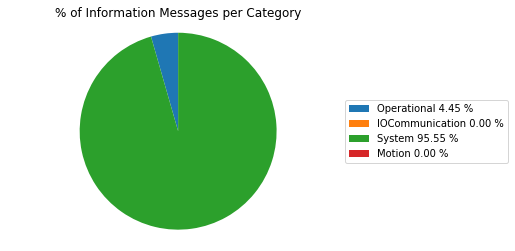

In [170]:
#Anteil von messages in den unterschiedlichen Categories (für Information msg)
sizes1 = df_info.groupby('message_category').message_number.count()
hunperc1 = df_info.groupby('message_category').message_number.count().sum()
perc1 = ["{:.2f} %".format(x*100/hunperc1) for x in sizes1]
labs1 = list(df_info.message_category.unique())

labels1 = list(map(lambda x, y: x+ ' ' +y, labs1, perc1))

fig1, ax1 = plt.subplots()
patches1, texts = ax1.pie(sizes1, startangle=90)
ax1.legend(patches1, labels1, loc="center right", bbox_to_anchor=(1.5,0.5))
ax1.set_title("% of Information Messages per Category")
ax1.axis('equal')

plt.show()

In [46]:
df_warning = df[df.message_severity == 'Warning']

len(df_warning.message_number.unique())

65

In [160]:
sizes = df_warning.groupby('message_category').message_number.count()
hunperc = df_warning.groupby('message_category').message_number.count().sum()

perc = ["{:.2f} %".format(x*100/hunperc) for x in sizes]
print(perc)
print(sizes)

['0.00 %', '4.40 %', '91.87 %', '0.02 %', '1.77 %', '0.80 %', '1.15 %']
message_category
Hardware                26
IOCommunication     104418
Motion             2180588
Operational            407
Program              41925
System               18974
User                 27241
Name: message_number, dtype: int64


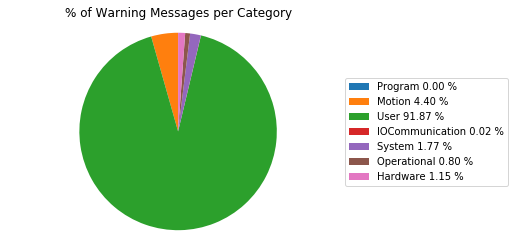

In [165]:
#Anteil von messages in den unterschiedlichen Categories (für Information msg)
labs = list(df_warning.message_category.unique())
labels = list(map(lambda x, y: x+ ' ' +y, labs, perc))
sizes = df_warning.groupby('message_category').message_number.count()

fig1, ax = plt.subplots()
patches, texts = ax.pie(sizes, startangle=90)
ax.legend(patches, labels, loc="center right", bbox_to_anchor=(1.5,0.5))
ax.set_title("% of Warning Messages per Category")
ax.axis('equal')

plt.show()

In [48]:
df_error = df[df.message_severity == 'Error']

len(df_error.message_number.unique())

114

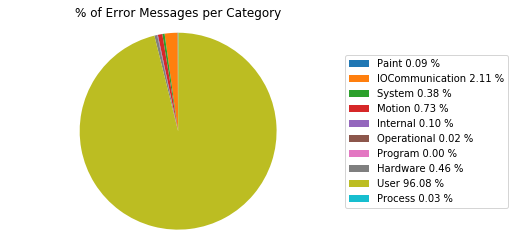

In [171]:
#Anteil von messages in den unterschiedlichen Categories (für Error msg)
sizes2 = df_error.groupby('message_category').message_number.count()
hunperc2 = df_error.groupby('message_category').message_number.count().sum()
perc2 = ["{:.2f} %".format(x*100/hunperc2) for x in sizes2]
labs2 = list(df_error.message_category.unique())

labels2 = list(map(lambda x, y: x+ ' ' +y, labs2, perc2))

fig2, ax2 = plt.subplots()
patches2, texts = ax2.pie(sizes2, startangle=90)
ax2.legend(patches2, labels2, loc="center right", bbox_to_anchor=(1.5,0.5))
ax2.set_title("% of Error Messages per Category")
ax2.axis('equal')

plt.show()